In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 📰 Fake News Detection with Logistic Regression

## In this project, we’ll build a simple machine learning model to classify news articles as **real or fake** using natural language processing (NLP) techniques and logistic regression.

## 📥 Step 1: Load Required Libraries
### We'll use `pandas`, `scikit-learn`, and `matplotlib` for data processing, modeling, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 📁 Step 2: Load the Dataset
### We use the "Fake and Real News Dataset" from Kaggle, which contains labeled examples of real and fake news articles.

In [2]:
# Load the dataset
df_fake = pd.read_csv('/kaggle/input/fake-data/Fake.csv')
df_real = pd.read_csv('/kaggle/input/true-data/True.csv')

# Add label column
df_fake['label'] = 0  # fake
df_real['label'] = 1  # real

# Combine both
df = pd.concat([df_fake, df_real], ignore_index=True)
df = df[['title', 'text', 'label']]
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


## 🧹 Step 3: Clean and Prepare the Text
### We'll combine the title and text into one field and drop any rows with missing values.

In [3]:
# Drop nulls and combine fields
df.dropna(inplace=True)
df["content"] = df["title"] + " " + df["text"]
df = df[["content", "label"]]
df.head()

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


## 🔤 Step 4: Convert Text to Numerical Vectors with TF-IDF
### We use TF-IDF to represent text as numbers based on word frequency and uniqueness.

In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df["content"])
y = df["label"]

## ✂️ Step 5: Split the Data
### We'll split the dataset into training and testing sets (80% / 20%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Step 6: Train Logistic Regression Model

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 📊 Step 7: Evaluate the Model
### We’ll use accuracy, classification report, and confusion matrix to assess performance.

Accuracy: 0.9857461024498887

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



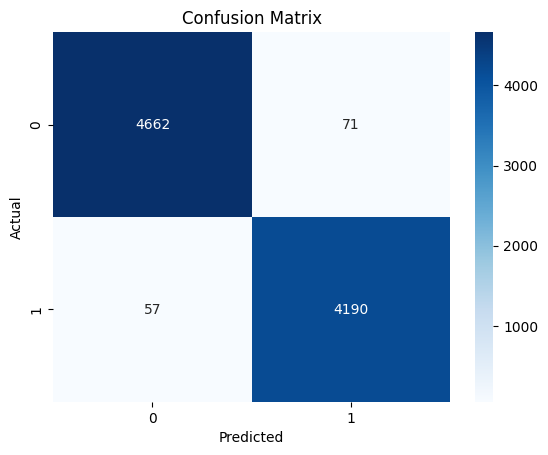

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 🔮 Step 8: Predict New Sample News
### Try classifying a made-up news headline to see how the model performs on unseen data.

In [8]:
sample = ["Aliens have landed in Canada and offered free internet"]
sample_vector = tfidf.transform(sample)
prediction = model.predict(sample_vector)

print("Prediction:", "Real" if prediction[0] == 1 else "Fake")

Prediction: Fake
